## __Puma US Sales Analysis__

### __Data Overview__

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\lakshita rawat\Downloads\Project_2\Dataset_1.csv")
df.head()

,Retailer,Months,Year,Invoice Date,Region,State,City,Product,Price per Unit($),Units Sold,Total Sales($),Operating Profit($),Operating Margin,Sales Method
0,Foot Locker,January,2020,01-01-2020,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,January,2020,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,January,2020,03-01-2020,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,January,2020,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,January,2020,05-01-2020,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store


##### _A quick overview of the dataset helps us understand its structure, key variables, and basic statistics, ensuring the data is ready for deeper analysis_

In [ ]:
print(df.shape) #total rows and columns
print()

print(df.columns)
print()

print(df.isnull().sum())
print()

print(df.duplicated().sum())
print()

print(df.describe())
print()

print(df.info())

(9648, 14)

Index(['Retailer', 'Months', 'Year', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit($)', 'Units Sold', 'Total Sales($)',
       'Operating Profit($)', 'Operating Margin', 'Sales Method'],
      dtype='object')

Retailer               0
Months                 0
Year                   0
Invoice Date           0
Region                 0
State                  0
City                   0
Product                0
Price per Unit($)      0
Units Sold             0
Total Sales($)         0
Operating Profit($)    0
Operating Margin       0
Sales Method           0
dtype: int64

0

              Year  Price per Unit($)   Units Sold  Total Sales($)  \
count  9648.000000        9648.000000  9648.000000     9648.000000   
mean   2020.865050          45.216625   256.930037    93273.437500   
std       0.341688          14.705397   214.252030   141916.016727   
min    2020.000000           7.000000     0.000000        0.000000   
25%    2021.000000          35

In [16]:
# All unique states
unique_states = df['State'].unique()
print(unique_states)
print()

# Total Count
num_states = df['State'].nunique()
print("Number of unique states:", num_states)
print()

# All unique cities
unique_cities = df['City'].unique()
print(unique_cities)
print()

# Total Count
num_states = df['City'].nunique()
print("Number of unique cities:", num_states)

['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']

Number of unique states: 50

['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattle' 'Miami' 'Minneapolis'
 'Billings' 'Knoxville' 'Omaha' 'Birmingham' 'Portland' 'Anchorage'
 'Honolulu' 'Orlando' 'Albany' 'Cheyenne' 'Richmond' 'Detroit' 'St. Louis'
 'Salt Lake City' 'New Orleans' 'Boise' 'Phoenix' 'Albuquerque' 'Atlanta'
 'Charleston' 'Charlotte' 'Colu

### __Univariate Analysis__
##### *To begin the analysis, first let's look at each variable individually to understand how sales, revenue, discounts, and product categories are distributed within the Puma dataset*

In [39]:
df.columns

Index(['Retailer', 'Months', 'Year', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit($)', 'Units Sold', 'Total Sales($)',
       'Operating Profit($)', 'Operating Margin', 'Sales Method'],
      dtype='object')

- The overall distribution of total sales is analyzed to understand how sales are spread across the dataset.
- The analysis identifies which products contribute the most to overall sales.
- Sales are studied across different regions, states, and cities to capture the geographical distribution.
- The distribution of units sold is examined to highlight sales volume patterns across products.
- The sales methods (online, offline, wholesale, etc.) are explored to determine the most frequently used channel.

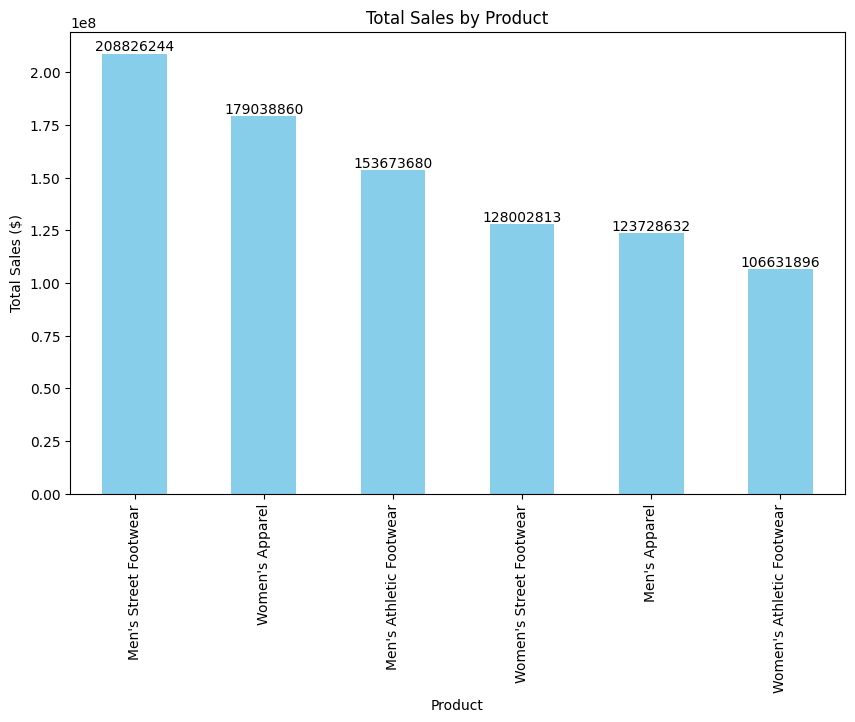

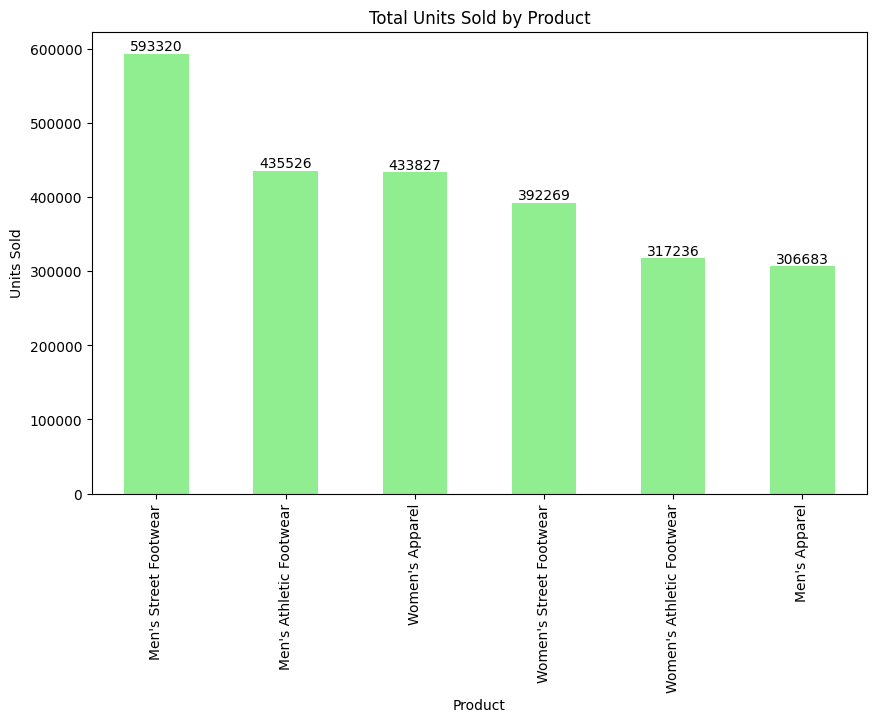

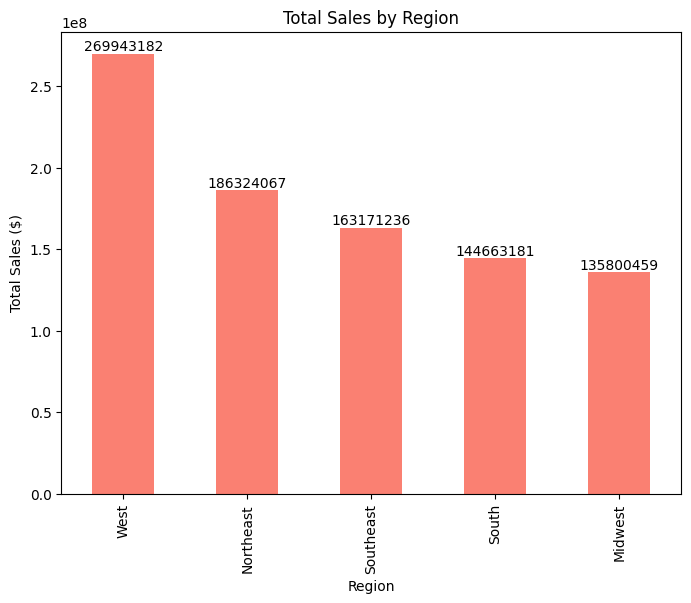

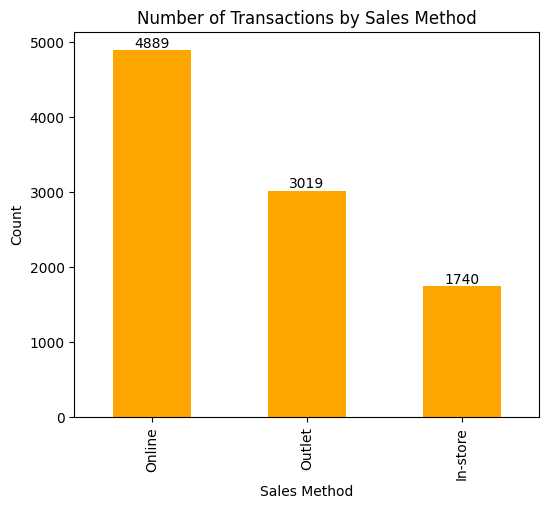

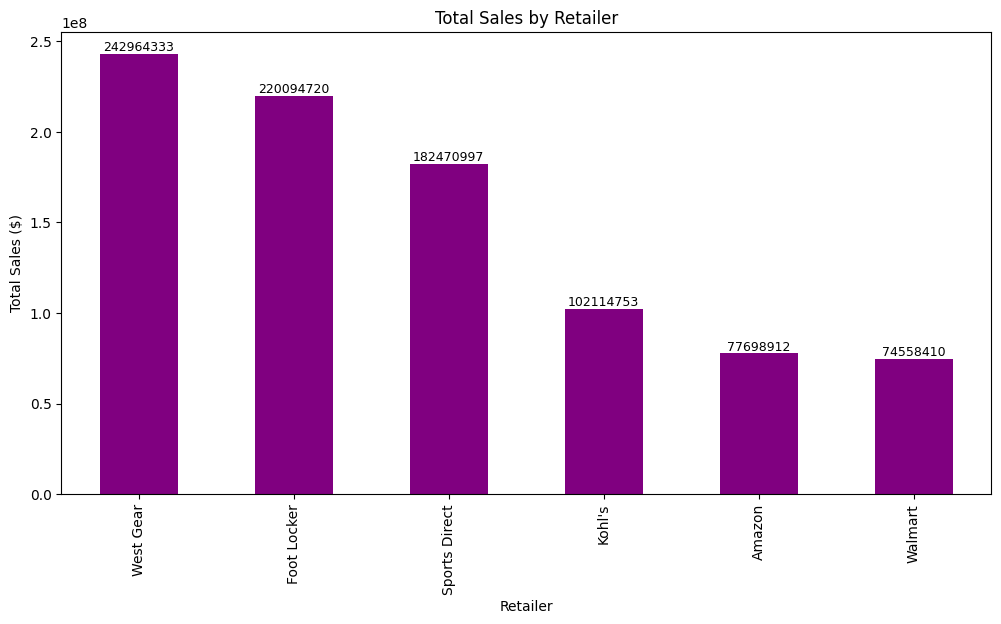

In [ ]:
import matplotlib.pyplot as plt

# 1. Total Sales by Product 
sales_by_product = df.groupby('Product')['Total Sales($)'].sum().sort_values(ascending=False)
ax = sales_by_product.plot(kind='bar', figsize=(10,6), color="skyblue")
for i, v in enumerate(sales_by_product):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom')
plt.title("Total Sales by Product")
plt.ylabel("Total Sales ($)")
plt.show()


# 2. Units Sold by Product 
units_by_product = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
ax = units_by_product.plot(kind='bar', figsize=(10,6), color="lightgreen")
for i, v in enumerate(units_by_product):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom')
plt.title("Total Units Sold by Product")
plt.ylabel("Units Sold")
plt.show()


# 3. Total Sales by Region
sales_by_region = df.groupby('Region')['Total Sales($)'].sum().sort_values(ascending=False)
ax = sales_by_region.plot(kind='bar', figsize=(8,6), color="salmon")
for i, v in enumerate(sales_by_region):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom')
plt.title("Total Sales by Region")
plt.ylabel("Total Sales ($)")
plt.show()


# 4. Sales Count by Method
method_counts = df['Sales Method'].value_counts()
ax = method_counts.plot(kind='bar', figsize=(6,5), color="orange")
for i, v in enumerate(method_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.title("Number of Transactions by Sales Method")
plt.ylabel("Count")
plt.show()


# 5. Total Sales by Retailer
sales_by_retailer = df.groupby('Retailer')['Total Sales($)'].sum().sort_values(ascending=False)
ax = sales_by_retailer.plot(kind='bar', figsize=(12,6), color="purple")
for i, v in enumerate(sales_by_retailer):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom', fontsize=9)
plt.title("Total Sales by Retailer")
plt.ylabel("Total Sales ($)")
plt.show()

### __Time Analysis (Year, Month, Invoice Date)__


**Here through the analysis we'll get to know:**

- Is Puma’s sales revenue growing, stable, or declining year-over-year?
- Which months consistently show peak sales, and which months lag behind?
- How do monthly sales trends compare across different years?
- Is the AOV growing, suggesting stronger brand positioning, or shrinking, indicating price sensitivity?
- How are online, offline, and in-store sales channels performing over time?

In [41]:
df.columns

Index(['Retailer', 'Months', 'Year', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit($)', 'Units Sold', 'Total Sales($)',
       'Operating Profit($)', 'Operating Margin', 'Sales Method'],
      dtype='object')

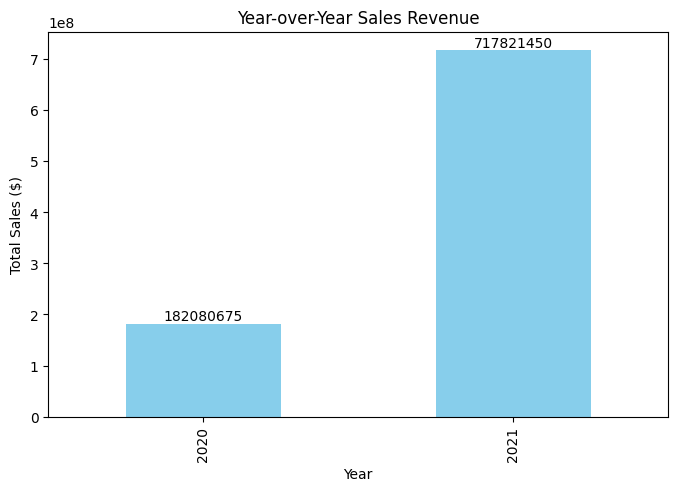

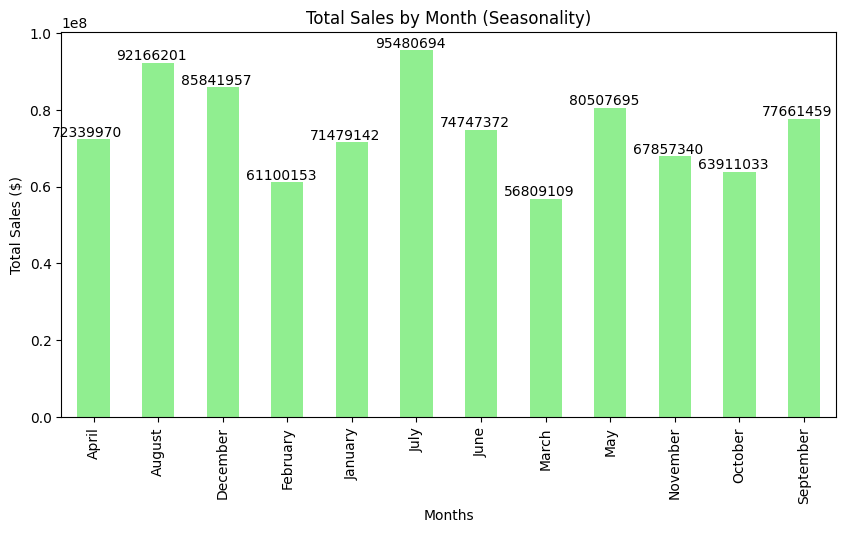

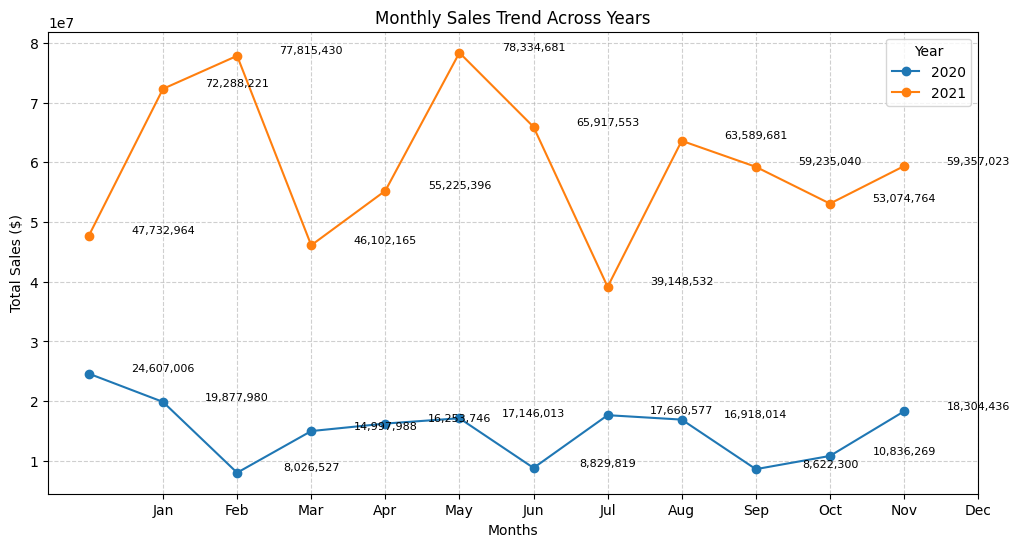

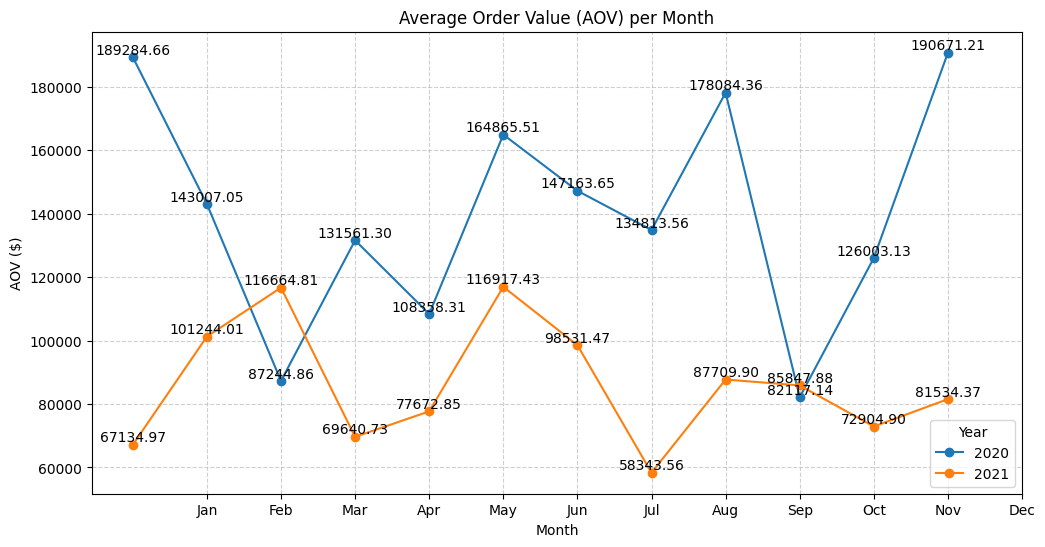

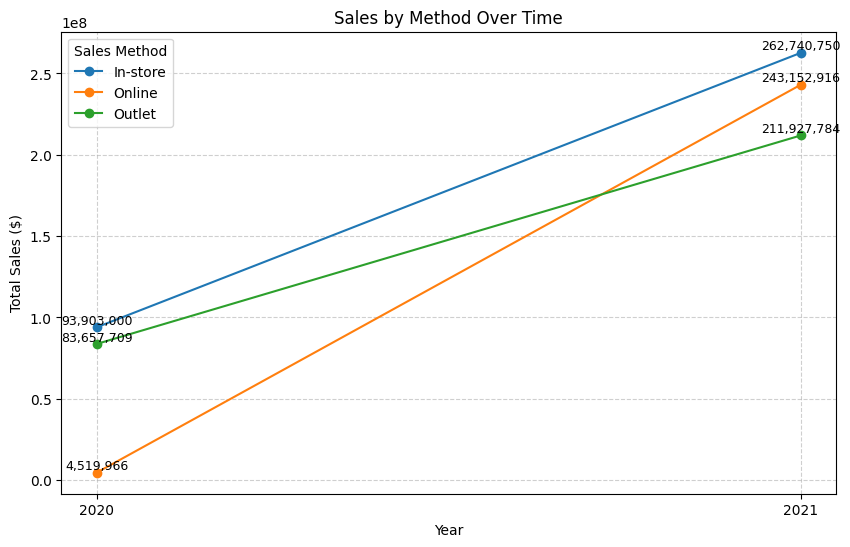

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Year-over-Year Sales Trend
yearly_sales = df.groupby('Year')['Total Sales($)'].sum()
ax = yearly_sales.plot(kind='bar', color="skyblue", figsize=(8,5))
for i, v in enumerate(yearly_sales):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom')
plt.title("Year-over-Year Sales Revenue")
plt.ylabel("Total Sales ($)")
plt.show()



# 2. Monthly Sales (Across All Years) – Seasonality
monthly_sales = df.groupby('Months')['Total Sales($)'].sum()
ax = monthly_sales.plot(kind='bar', color="lightgreen", figsize=(10,5))
for i, v in enumerate(monthly_sales):
    ax.text(i-0.1, v, f'{int(v)}', ha='center', va='bottom')
plt.title("Total Sales by Month (Seasonality)")
plt.xlabel("Months")
plt.ylabel("Total Sales ($)")
plt.show()



# 3. Monthly Sales Trend across Years with Annotations
monthly_trend = df.groupby(['Year','Months'])['Total Sales($)'].sum().unstack(0)
ax = monthly_trend.plot(marker='o', figsize=(12,6))

# Add annotations
for year in monthly_trend.columns:
    for i, v in enumerate(monthly_trend[year]):
        if pd.notna(v):
            ax.text(i+1, v, f'{int(v):,}', ha='center', va='bottom', fontsize=8, rotation=0)

plt.title("Monthly Sales Trend Across Years")
plt.xlabel("Months")
plt.ylabel("Total Sales ($)")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



# 4. Average Order Value (AOV) per Month
monthly_orders = df.groupby(['Year','Months']).agg(
    total_sales=('Total Sales($)','sum'),
    total_orders=('Invoice Date','count')
)
monthly_orders['AOV'] = monthly_orders['total_sales'] / monthly_orders['total_orders']

aov = monthly_orders['AOV'].unstack(0)

ax = aov.plot(kind='line', marker='o', figsize=(12,6))

# Add values above points
for year in aov.columns:
    for i, v in enumerate(aov[year]):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.title("Average Order Value (AOV) per Month")
plt.ylabel("AOV ($)")
plt.xlabel("Month")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



# 5. Yearly Sales Method Growth
# Ensure Year column is integer (sometimes it's string/object)
df['Year'] = df['Year'].astype(int)

# Group by Year and Sales Method
method_trend = df.groupby(['Year', 'Sales Method'])['Total Sales($)'].sum().reset_index()

# Pivot for plotting (Years as x-axis, Methods as columns)
pivot_trend = method_trend.pivot(index='Year', columns='Sales Method', values='Total Sales($)')

# Line chart
ax = pivot_trend.plot(kind='line', marker='o', figsize=(10,6))

# Add values above each point
for method in pivot_trend.columns:
    for i, v in enumerate(pivot_trend[method]):
        if pd.notna(v):
            ax.text(pivot_trend.index[i], v, f'{int(v):,}', ha='center', va='bottom', fontsize=9)

plt.title("Sales by Method Over Time")
plt.ylabel("Total Sales ($)")
plt.xlabel("Year")
plt.xticks(pivot_trend.index)  # ensure all years are shown
plt.legend(title="Sales Method")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

##### __*Insights from the graph*__
1. **Year-over-Year Sales Revenue**- Sales revenue showed explosive growth from 2020 to 2021, jumping from $182M to $717M, highlighting a strong year-over-year recovery and expansion.

2. **Monthly Sales Seasonality**- 
- Sales displayed clear seasonal fluctuations.
- July (≈$95M) and August (≈$92M) were peak months, likely driven by summer demand or mid-year promotions,February (≈$61M) and March (≈$57M) marked the lowest sales, suggesting weaker demand in early spring.
- Sales show a clear seasonal pattern, with sharp spikes in **July and August**, likely boosted by **back-to-school demand and heightened sports enthusiasm during the Olympic period in both 2020 and 2021**. In contrast, **February and March** record noticeable dips, reflecting the **post-holiday lull, fewer retail events**, and transitional slowdown in consumer spending
3. **Average Order Value (AOV) per Month**
- In 2020, AOV was much higher, peaking at $190K+ in September and December, though with high fluctuations month-to-month.
- In 2021, AOV stabilized at lower levels (≈$70K–$80K), indicating a strategy shift toward higher sales volume with smaller basket sizes, possibly due to discounts or entry-level product pushes.
4. **Sales by Method Over Time**
- In-store sales remained the leader, growing steadily from $93M (2020) to $262M (2021).
- Online sales skyrocketed from just $4.5M to $243M, showing massive adoption of digital channels.
- Outlet sales also rose strongly from $83M to $211M, indicating expansion through physical retail presence.

### __Regional Analysis__
**Here through the analysis we'll get to know:**
- Analyzing the State Level Sales data
- Which region has the max sales?
- Which region has the max Operating Profit?
- Which region has the max/min operating margin and finding it's efficiecy?
- Which Sales Method is prefered in which region?
- Finding out the top 10 states and cities by Sales and Operating Profit

In [6]:
df.columns

Index(['Retailer', 'Months', 'Year', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit($)', 'Units Sold', 'Total Sales($)',
       'Operating Profit($)', 'Operating Margin', 'Sales Method'],
      dtype='object')

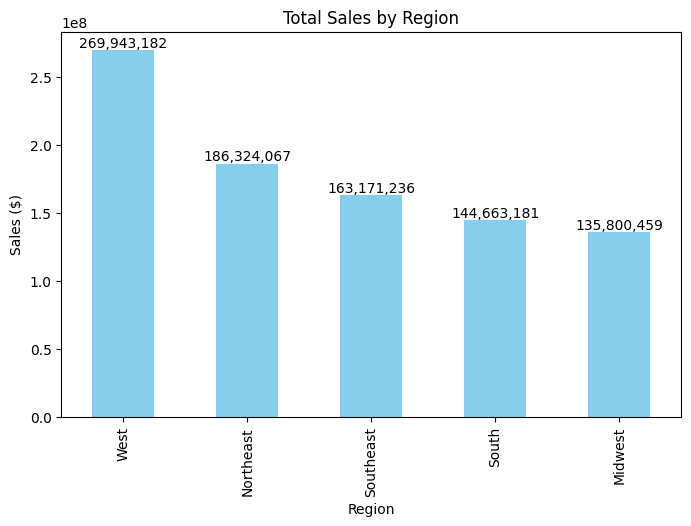

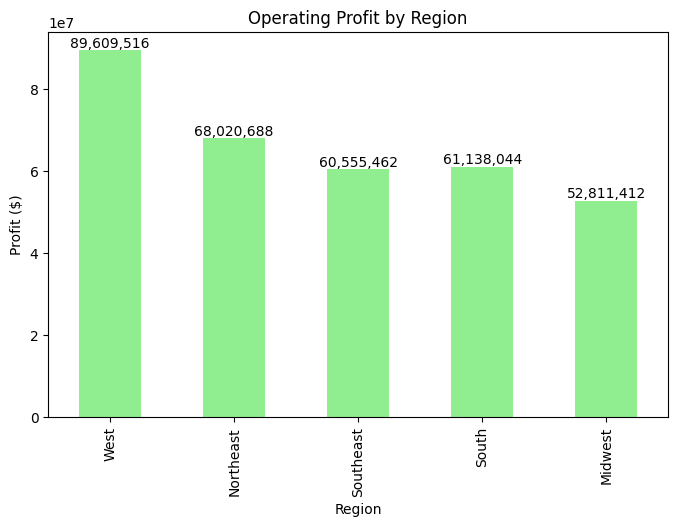

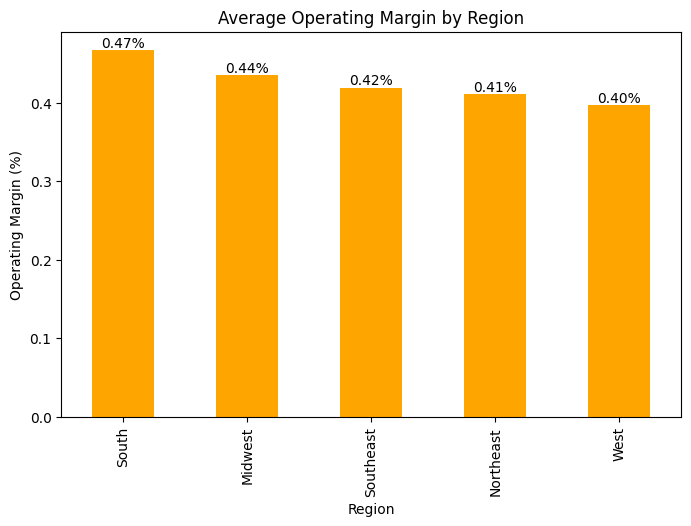

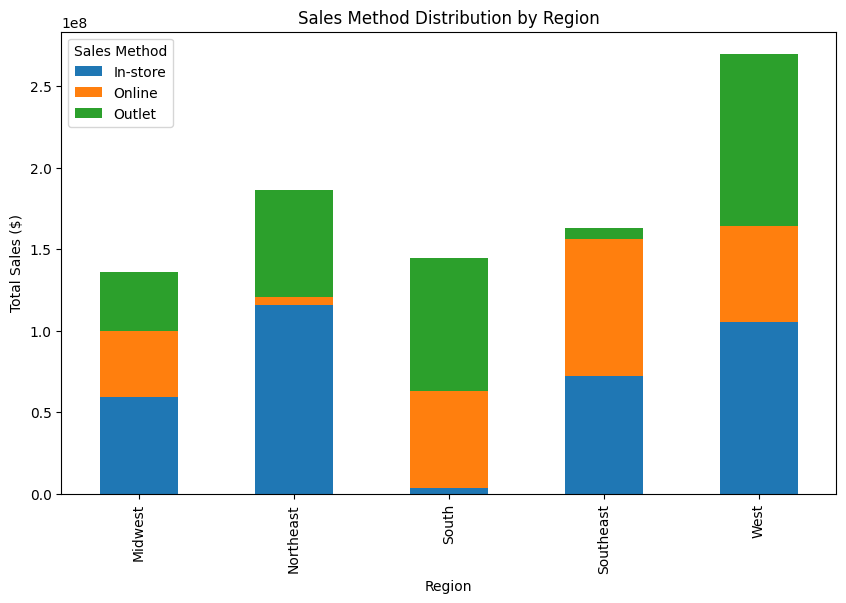

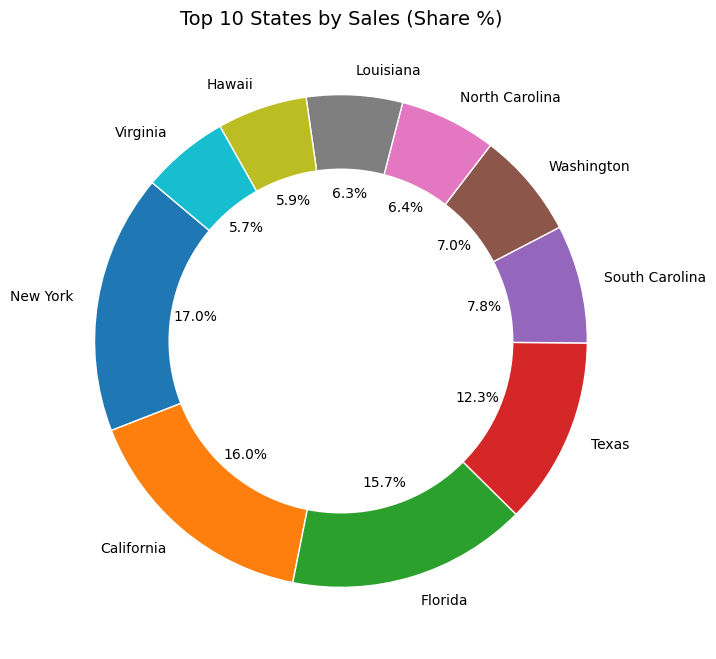

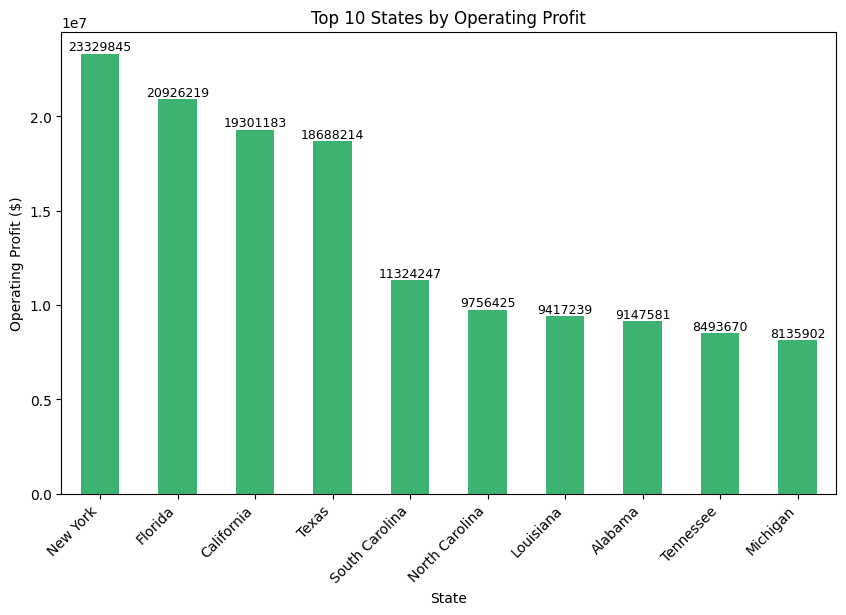

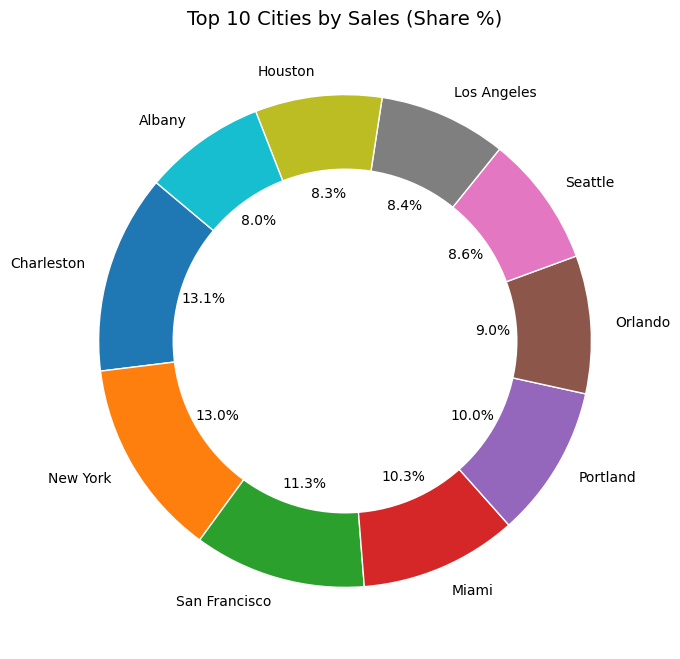

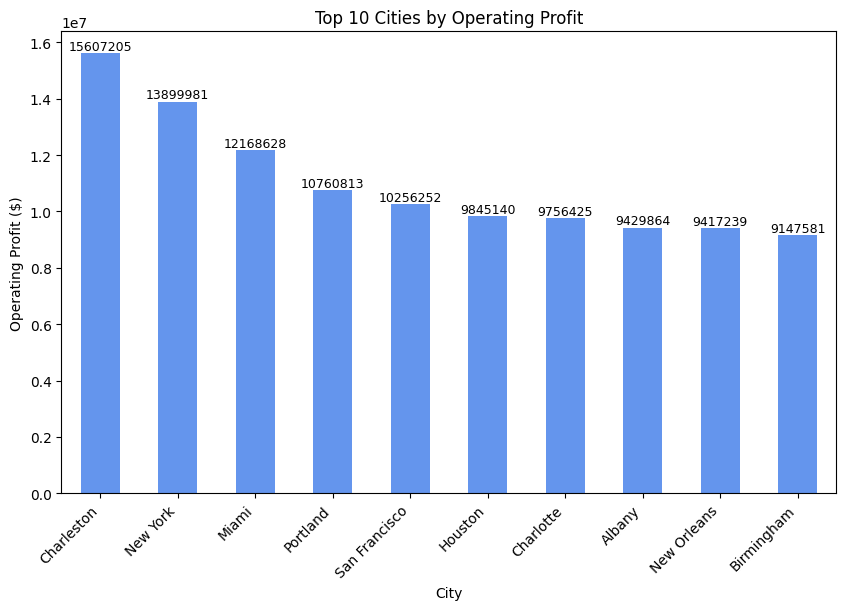

In [20]:
import pandas as pd
import plotly.express as px
import us   #library is installed

# Aggregate total sales by state from your main dataset df
state_sales_map = df.groupby('State', as_index=False)['Total Sales($)'].sum()

# Clean state names
state_sales_map['State'] = state_sales_map['State'].str.strip()

# Convert state names to abbreviations (CA, TX, NY, etc.)
state_sales_map['State_Abbr'] = state_sales_map['State'].apply(
    lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None
)

# Drop rows where abbreviation could not be found
state_sales_map = state_sales_map.dropna(subset=['State_Abbr'])

# Choropleth Map
fig = px.choropleth(
    state_sales_map,
    locations='State_Abbr',          # use abbreviations
    locationmode="USA-states",
    color='Total Sales($)',
    scope="usa",
    color_continuous_scale="Blues",
    title="State-Level Sales Map",
    hover_name="State",
    hover_data={'Total Sales($)':':,.0f'}
)
fig.show()



# 2. Total Sales by Region
region_perf = df.groupby('Region')[['Total Sales($)', 'Operating Profit($)']].sum().sort_values('Total Sales($)', ascending=False)

ax = region_perf['Total Sales($)'].plot(kind='bar', figsize=(8,5), color="skyblue")
for i, v in enumerate(region_perf['Total Sales($)']):
    ax.text(i, v, f'{int(v):,}', ha='center', va='bottom')
plt.title("Total Sales by Region")
plt.ylabel("Sales ($)")
plt.show()



# 3. Operating Profit by Region
ax = region_perf['Operating Profit($)'].plot(kind='bar', figsize=(8,5), color="lightgreen")
for i, v in enumerate(region_perf['Operating Profit($)']):
    ax.text(i, v, f'{int(v):,}', ha='center', va='bottom')
plt.title("Operating Profit by Region")
plt.ylabel("Profit ($)")
plt.show()



# 4. Average Operating Margin by Region
region_margin = df.groupby('Region')['Operating Margin'].mean().sort_values(ascending=False)
ax = region_margin.plot(kind='bar', figsize=(8,5), color="orange")
for i, v in enumerate(region_margin):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.title("Average Operating Margin by Region")
plt.ylabel("Operating Margin (%)")
plt.show()



# 5.Sales Method Distribution by Region
region_method = df.groupby(['Region','Sales Method'])['Total Sales($)'].sum().unstack()
ax = region_method.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Sales Method Distribution by Region")
plt.ylabel("Total Sales ($)")
plt.legend(title="Sales Method")
plt.show()



# 6. Top 10 States by Sales (Pie/Donut)
state_sales = df.groupby('State')['Total Sales($)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    state_sales, 
    labels=state_sales.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'linewidth':1, 'edgecolor':'white'}
)
# Donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 10 States by Sales (Share %)", fontsize=14)
plt.show()



# 7. Operating Profit by Top 10 States
top_states_profit = df.groupby('State')['Operating Profit($)'].sum().sort_values(ascending=False).head(10)

ax = top_states_profit.plot(kind='bar', figsize=(10,6), color="mediumseagreen")
for i, v in enumerate(top_states_profit):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom', fontsize=9)

plt.title("Top 10 States by Operating Profit")
plt.ylabel("Operating Profit ($)")
plt.xlabel("State")
plt.xticks(rotation=45, ha="right")
plt.show()



# 8. Top 10 Cities by Sales (Pie/Donut)
city_sales = df.groupby('City')['Total Sales($)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    city_sales, 
    labels=city_sales.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'linewidth':1, 'edgecolor':'white'}
)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Top 10 Cities by Sales (Share %)", fontsize=14)
plt.show()



# 9. Operating Profit by Top 10 Cities
top_cities_profit = df.groupby('City')['Operating Profit($)'].sum().sort_values(ascending=False).head(10)

ax = top_cities_profit.plot(kind='bar', figsize=(10,6), color="cornflowerblue")
for i, v in enumerate(top_cities_profit):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom', fontsize=9)

plt.title("Top 10 Cities by Operating Profit")
plt.ylabel("Operating Profit ($)")
plt.xlabel("City")
plt.xticks(rotation=45, ha="right")
plt.show()

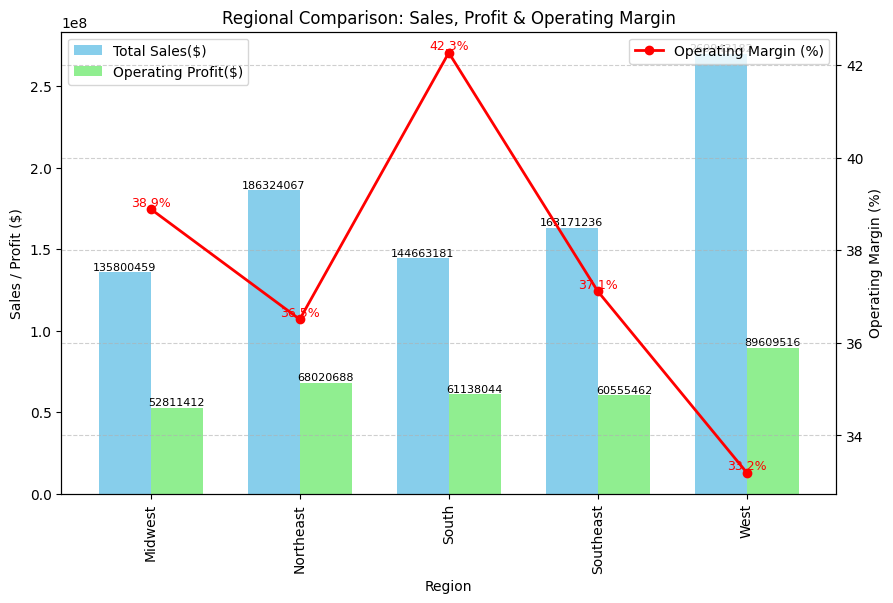

In [ ]:
import matplotlib.pyplot as plt

# Group by Region
region_summary = df.groupby('Region').agg({
    'Total Sales($)': 'sum',
    'Operating Profit($)': 'sum'
})
region_summary['Operating Margin (%)'] = (region_summary['Operating Profit($)'] / region_summary['Total Sales($)']) * 100

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Sales & Profit
region_summary[['Total Sales($)', 'Operating Profit($)']].plot(
    kind='bar', ax=ax1, width=0.7, color=['skyblue','lightgreen']
)

ax1.set_ylabel("Sales / Profit ($)")
ax1.set_title("Regional Comparison: Sales, Profit & Operating Margin")

# Add value labels for bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=8)

# Second y-axis for Margin
ax2 = ax1.twinx()
ax2.plot(region_summary.index, region_summary['Operating Margin (%)'], 
         color='red', marker='o', linewidth=2, label="Operating Margin (%)")
ax2.set_ylabel("Operating Margin (%)")

# Add value labels for margin points
for i, v in enumerate(region_summary['Operating Margin (%)']):
    ax2.text(i, v, f"{v:.1f}%", ha='center', va='bottom', color='red', fontsize=9)

# Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### __*Insights from the graph*__
- The **West leads in sales and profit** but struggles with the lowest margin, mainly due to higher costs and discount-heavy strategies, while the **South**, despite lower sales, achieves the **highest margin** by maintaining tighter cost control and focusing on more profitable sales, it has the **healthiest balance between profit and margin**. Even though sales are lower than the West, the South earns more per sale, which means sustainable profitability.

- The **Midwest and Northeast** show moderate sales and profits, with margins balancing between West’s low efficiency and South’s high efficiency, indicating steady but less extreme performance.